In [2]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np

import matplotlib.pyplot as plt

In [3]:
Ufonte = 10
R1 = 0.5
R2 = 0.5    
L = 10e-3
C = 1e-9
K = 0.2

Rcarga = 300

In [4]:
def calcula_transformador(Uf, Rc,Freq, R1, R2, L, C, K):
    L1 = L
    L2 = L
    C1 = C
    C2 = C
    XL1 = 1j * 2*pi*Freq*L1
    XL2 = 1j * 2*pi*Freq*L2
    XM = 1j * 2*pi*Freq * K * sqrt(L1*L2)
    XC1 = 1/(1j * 2*pi*Freq*C1)
    XC2 = 1/(1j * 2*pi*Freq*C2)
    Rpara = ((Rc*XC2)/ (Rc+XC2))
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, R2+XL2+ Rpara ]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)

    v2 = i[1] * Rpara
    return i[0], i[1], v2

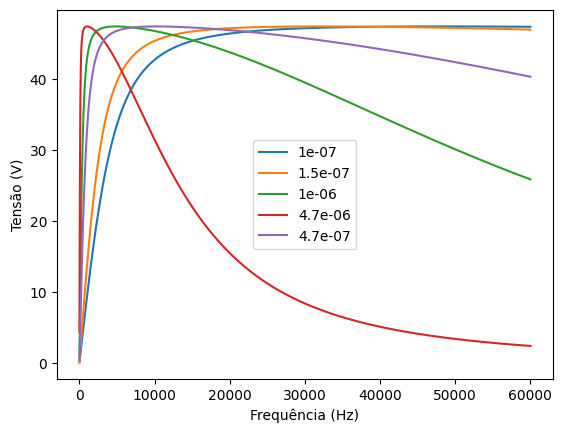

In [6]:
Rc = 300 # 300 Ohms
capacitor = [0.1e-6,150e-9,1e-6,4.7e-6,0.47e-6] # Valores das capacitâncias em Farads
frequencias = np.linspace(10, 60000, 1000) # Valores de frequencia em Hz

for C in capacitor:
    V2=[]
    for f in frequencias:
        L = 1/(4*(pi**2) * (f**2) * C)
        i1, i2, v2 = calcula_transformador(Ufonte, Rcarga,f,R1,R2,L,C,K)
        V2.append(abs(v2))
        
    plt.plot(frequencias, V2)
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Tensão (V)')
    plt.legend(capacitor)

    
plt.show()


In [8]:
L = 1/(4*(pi**2) * (30000**2) * 1.5e-7)
print(L)

0.00042217159850974073
